# Introduction: Song Popularity Prediction

- This challenge is about predicting Song Popularity based on a set of different features.
- This specific competition is about predicting Song Popularity based on a set of different features. 
- The data consists of the standard Kaggle train.csv and test.csv files, with a sample_submission.csv to show you the structure of the file that should be submitted.


# 1. Brief description of the data set and a summary of its attributes

## Variable Description
Ref: https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404

- **Danceability**: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
- **Valence**: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **Energy**: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.
- **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
- **Speechiness**: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- **Instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- **Key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- **Mode**: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **Duration**: The duration of the track in milliseconds.
- **Time Signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/song-popularity-prediction/sample_submission.csv
/kaggle/input/song-popularity-prediction/train.csv
/kaggle/input/song-popularity-prediction/test.csv


## Load the data

In [3]:
df_train = pd.read_csv("/kaggle/input/song-popularity-prediction/train.csv")
df_test = pd.read_csv("/kaggle/input/song-popularity-prediction/test.csv")
df_sample = pd.read_csv("/kaggle/input/song-popularity-prediction/sample_submission.csv")

# 2. Data Exploration

## Initial Plan of Data Exploration

- Analyze Missing Value
- Distribution Analysis
- Densisty Plot for All Columns
- Identify the Outliers
- Identify Categorical Attributes
- Correlation Analysis between the attributes

In [4]:
df_train.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [5]:
df_test.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,2,279758.0,0.810637,0.568858,0.125466,0.898841,0.0,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,3,249197.0,NaN,0.871789,0.557342,0.000715,4.0,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,4,NaN,0.765568,0.624687,0.710794,0.000346,8.0,0.308284,NaN,0,0.129284,88.703121,3,0.935571


### Traing Data Information

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [7]:
print(df_train.shape, df_test.shape)

(40000, 15) (10000, 14)


In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,19999.500000,11547.149720,0.000000,9999.750000,19999.500000,29999.250000,39999.000000
song_duration_ms,35899.0,193165.847572,45822.127679,25658.000000,166254.500000,186660.000000,215116.000000,491671.000000
acousticness,36008.0,0.276404,0.297928,-0.013551,0.039618,0.140532,0.482499,1.065284
danceability,35974.0,0.570951,0.190010,0.043961,0.424760,0.608234,0.718464,0.957131
energy,36025.0,0.683932,0.212662,-0.001682,0.539276,0.704453,0.870503,1.039741
instrumentalness,36015.0,0.036527,0.150024,-0.004398,0.000941,0.001974,0.003225,1.075415
key,35935.0,5.042605,3.372728,0.000000,2.000000,5.000000,8.000000,11.000000
liveness,35914.0,0.198514,0.151670,0.027843,0.111796,0.135945,0.212842,1.065298
loudness,36043.0,-7.407596,3.877198,-32.117911,-9.578139,-6.345413,-4.620711,-0.877346
audio_mode,40000.0,0.321150,0.466924,0.000000,0.000000,0.000000,1.000000,1.000000


## Missing Value Analysis

In [9]:
df_train.isnull().sum()

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

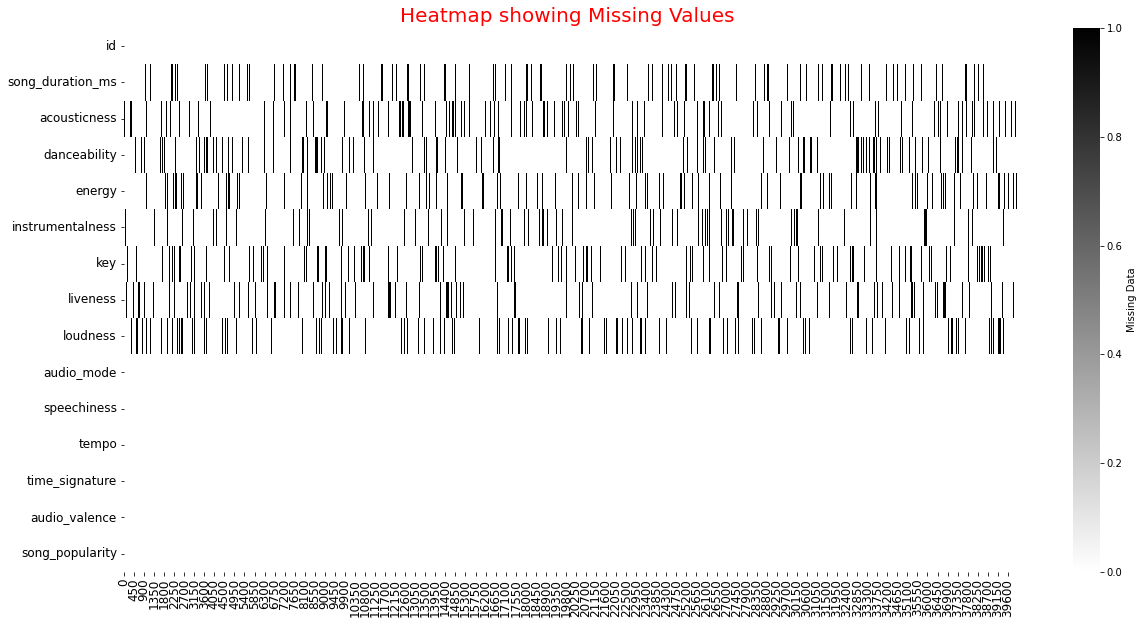

In [10]:
# missing value visualization.
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isna().transpose(),cmap="binary",cbar_kws={'label': 'Missing Data'})
#sns.heatmap(df_train.isnull().transpose(),cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values ', size = 20, color = 'red')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

## Distrubution

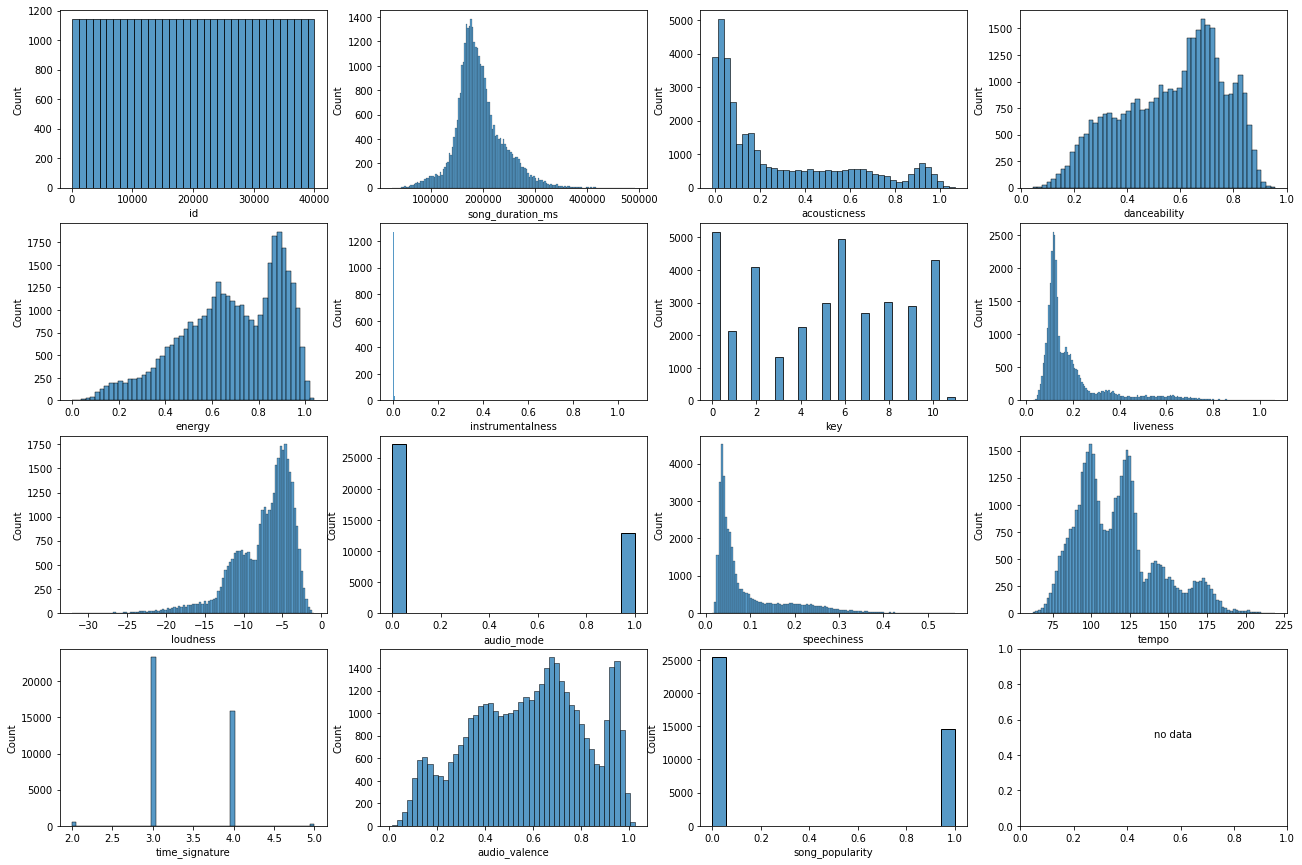

In [11]:
# find the distubution of the data. ( visualization would be so good)
column = df_train.columns
plt.figure
fig, ax = plt.subplots(4,4 , figsize=(22,15))
# we have 9 numerical values.
col, row = 4,4
col_count = 0
for r in range(row):
    for c in range(col):
        if col_count >= len(column):
            ax[r,c].text(0.5, 0.5, "no data")
        else:
            sns.histplot(data=df_train, x=column[col_count], ax=ax[r,c])
        col_count +=1
    

### Density plot for all the columns

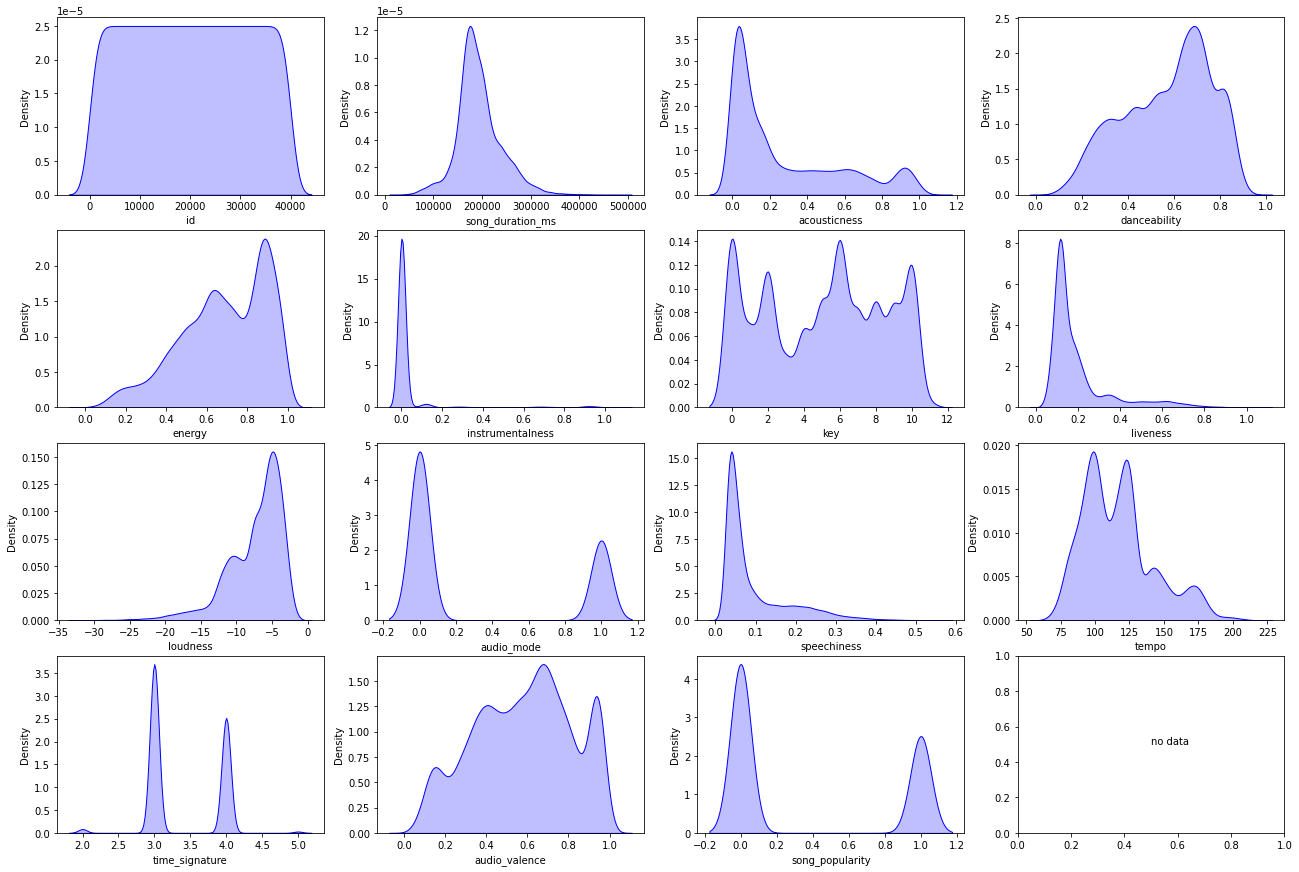

In [12]:
column = df_train.columns
plt.figure
fig, ax = plt.subplots(4,4 , figsize=(22,15))
# we have 9 numerical values.
col, row = 4,4
col_count = 0
for r in range(row):
    for c in range(col):
        if col_count >= len(column):
            ax[r,c].text(0.5, 0.5, "no data")
        else:
            sns.kdeplot(df_train[df_train.columns[col_count]], color="blue", shade=True, ax=ax[r,c])
        col_count +=1


### Outliers Visualization

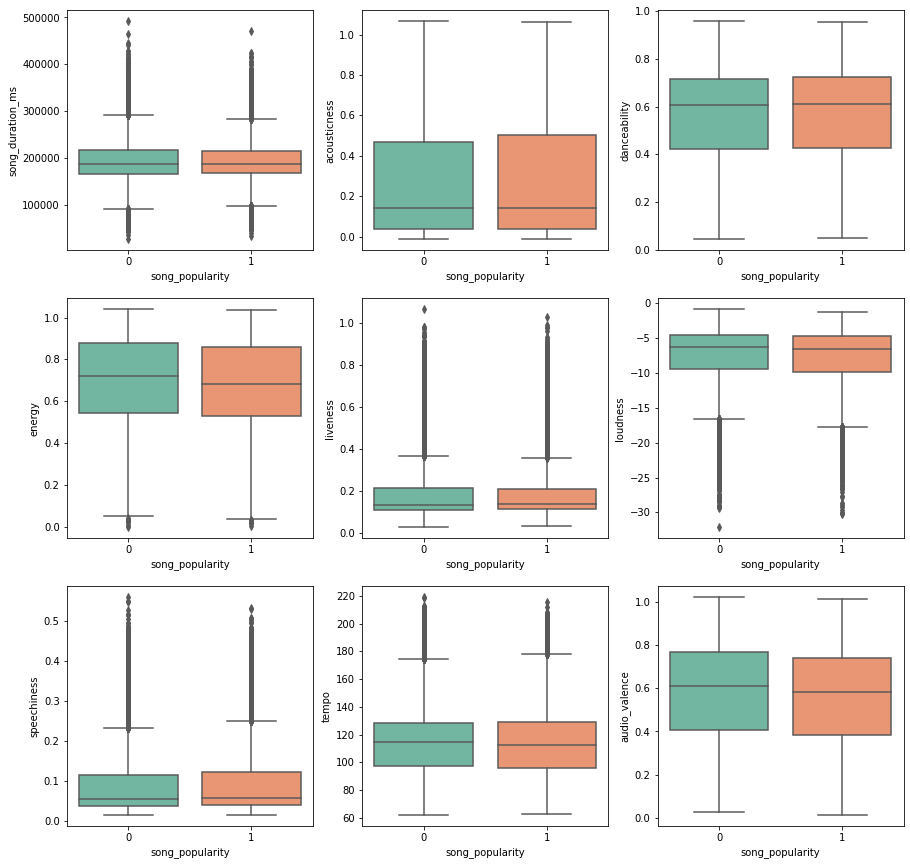

In [13]:
cotinuous_column_list = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
                        'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence',
                        ]
fig, ax = plt.subplots(3,3, figsize=(15,15))
row, col = 3, 3
col_count = 0
for r in range(row):
    for c in range(col):
        sns.boxplot(data=df_train, x="song_popularity", y=cotinuous_column_list[col_count], ax=ax[r,c], palette="Set2")
        
        col_count += 1

### Categorical Data

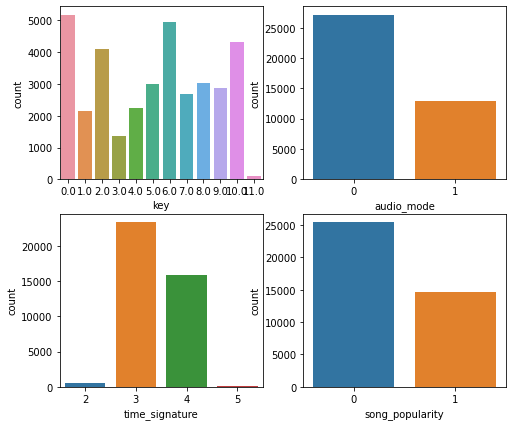

In [14]:
descrete_column_list = [ 'key', 'audio_mode','time_signature', 'song_popularity']
fig, ax = plt.subplots(2,2, figsize = (8,7))
row, col = 2, 2
col_count = 0
for r in range(row):
    for c in range(col):
        if col_count >= len(descrete_column_list):
            ax[r,c].text(0.5, 0.5, "no data")
        else:
            sns.countplot(data=df_train, x=descrete_column_list[col_count], ax=ax[r,c])
        col_count +=1

### Correlation Analysis

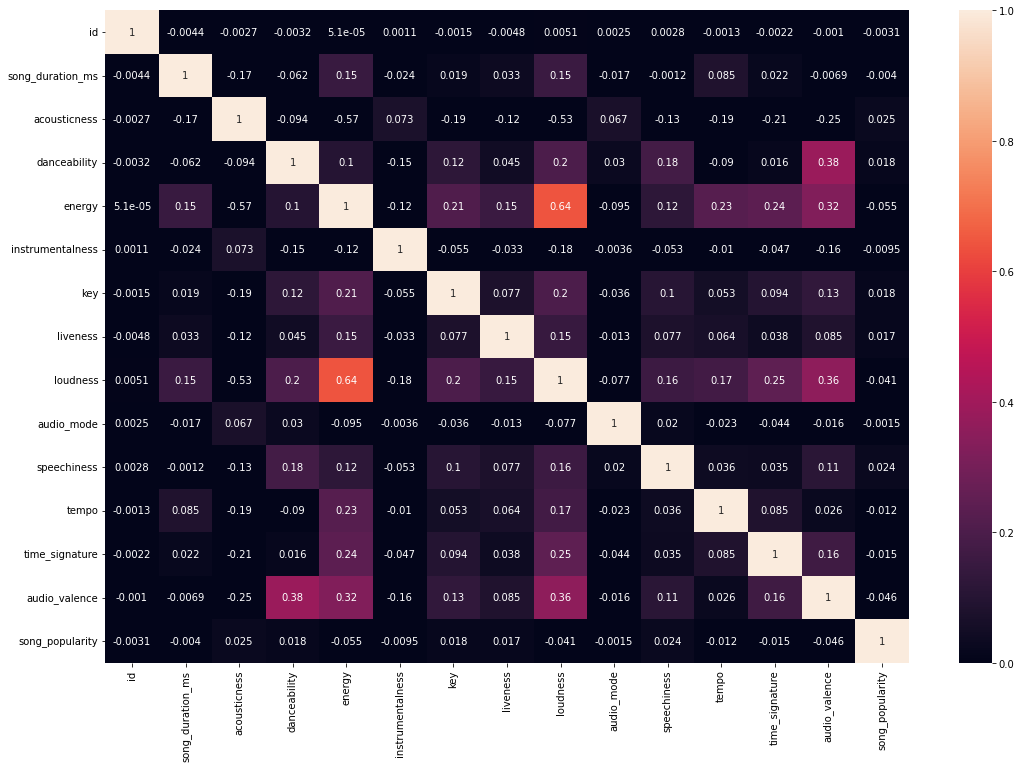

In [15]:
# can be done by heatmap.
fig = plt.figure(figsize = (18,12))
sns.heatmap(data=df_train.corr(), annot=True, vmin=0, vmax=1,)
plt.show()

# 3. Actions taken for data cleaning and feature engineering
- Imputation is one of the technique that can be used for replacing missing values
- In case of a non-numerical value, we could have used encoding like Ordinal Encoding, OneHot Encoding, Lable Encoding, etc. based on the type of value
- Heavily right-skewed or left skewed data can be normalized by log functions.

## Imputation

- Remove missing values using IterativeImputer

In [16]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

In [17]:
FEATURES = df_train.columns[:-1]

In [18]:
%%time
it_imputer = IterativeImputer(max_iter=50)
df_train_iterimp = pd.DataFrame(it_imputer.fit_transform(df_train[FEATURES]), columns = FEATURES)
df_test_iterimp = pd.DataFrame(it_imputer.transform(df_test[FEATURES]), columns = FEATURES)

CPU times: user 4.39 s, sys: 4.09 s, total: 8.49 s
Wall time: 2.15 s


In [19]:
df_train_iterimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  float64
 1   song_duration_ms  40000 non-null  float64
 2   acousticness      40000 non-null  float64
 3   danceability      40000 non-null  float64
 4   energy            40000 non-null  float64
 5   instrumentalness  40000 non-null  float64
 6   key               40000 non-null  float64
 7   liveness          40000 non-null  float64
 8   loudness          40000 non-null  float64
 9   audio_mode        40000 non-null  float64
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  float64
 13  audio_valence     40000 non-null  float64
dtypes: float64(14)
memory usage: 4.3 MB


In [20]:
df_test_iterimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  float64
 1   song_duration_ms  10000 non-null  float64
 2   acousticness      10000 non-null  float64
 3   danceability      10000 non-null  float64
 4   energy            10000 non-null  float64
 5   instrumentalness  10000 non-null  float64
 6   key               10000 non-null  float64
 7   liveness          10000 non-null  float64
 8   loudness          10000 non-null  float64
 9   audio_mode        10000 non-null  float64
 10  speechiness       10000 non-null  float64
 11  tempo             10000 non-null  float64
 12  time_signature    10000 non-null  float64
 13  audio_valence     10000 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


# 4. Key Findings and Insights

- The features are not so much correlated to target values.
- The is high co-relation between 'loudness' and 'energy'
- Few of the columns like 'acousticness', 'liveness', 'speechiness' and 'tempo' are left skewed
- Few of the columns like 'danceability', 'energy' and 'audio_valence' are right skewed
- Few features are categorical like 'key', 'audio_mode' and 'time_signature'
- Feature like 'liveness', has many outlies which needs to be actioned

# 5. Hypothesis about this data

### Hypothesis 1

- Ho (Null Hypothesis) = "loudness has an effect on dancability"
- Ha (Alternate Hypothesis) = "loudness has NO effect on dancability"

### Hypothesis 2

- Ho (Null Hypothesis) = "liveness has an effect on energy"
- Ha (Alternate Hypothesis) = "liveness has NO effect on energy"

### Hypothesis 3

- Ho (Null Hypothesis) = "liveness is independent of loudness"
- Ha (Alternate Hypothesis) = "liveness is dependent on loudness"

### Hypothesis 3 Analysis

In [21]:
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Testing the dependency of liveness on loudness
Ho = "liveness is independent of loudness"
Ha = "liveness is dependent on loudness"

x = np.array(df_train_iterimp.loudness)
y = np.array(df_train_iterimp.liveness)

scaler = MinMaxScaler()

data = [x, y]
data_scaled = scaler.fit_transform(pd.DataFrame(data).T).T

#t, p_value = ttest_ind(x, y, axis = 0) # Performing the test
chi, p_value, dof, expected = chi2_contingency(data_scaled) # Performing the test

if p_value < 0.05: # Setting our significance level at 5%
 print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
 print(f'{Ho} as the p_value ({p_value}) > 0.05')

liveness is independent of loudness as the p_value (1.0) > 0.05


In [23]:
scaler.transform(pd.DataFrame(data).T).T

array([[0.84821843, 0.86045005, 0.86957941, ..., 0.53582019, 0.87885524,
        0.87202846],
       [0.18204215, 0.39383393, 0.13750532, ..., 0.07983074, 0.31660646,
        0.16680942]])

# 6. Conclusion and Next Steps

In this notebook, we have seen how the Basic Data Exploratory techniques works. Using pandas dataframe made it easier and efficient to read .csv file and to carry out further analysis (checking null, outlier variables and visualising the trends). \
Feature engineering methods was successfully carried out to deal with both variables and categorical features.
\
\
The next steps in relation to this EDA excercise could include:
- Trying more ststistical tests on the data
- Heavily skewed data needs to be normalized
- Create a model using training data for Song Popularity prediction
